In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
print("Current directory:", os.getcwd())

Current directory: c:\Mounika\All Projects\titanic-survival-prediction-v2\notebook


In [4]:
# Read the dataset
import os
# Define the path to the dataset
dataset_path = os.path.join("data","raw_data", "train.csv")
# Read the dataset
df = pd.read_csv(dataset_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display basic information about the dataset
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# See all the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_copy=df.copy()

In [11]:
df_copy.shape

(891, 12)

In [12]:
# Check for duplicate rows
df_copy.duplicated().value_counts() 

False    891
Name: count, dtype: int64

In [13]:
# check for duplicate column names
df_copy.columns[df.columns.duplicated()]

Index([], dtype='object')

In [14]:

# Check for duplicate columns in terms of values
duplicates = df_copy.T.duplicated() # df.T transposes the DataFrame so rows become columns and columns become rows
duplicate_columns = df_copy.columns[duplicates].tolist()
duplicate_columns


[]

In [15]:
# How to remove the duplicate columns
df_copy = df_copy.loc[:, ~df_copy.T.duplicated()]  # Keep only the first occurrence of each column

In [16]:
# Check the shape after removing duplicates
df_copy.shape

(891, 12)

In [17]:
# how to remove the junk columns
junk_columns = [col for col in df_copy.columns if df_copy[col].nunique() < 2 or 'unnamed' in col.lower()]
df_copy.drop(columns=junk_columns, inplace=True)
df_copy.shape

(891, 12)

In [18]:

# See if there are any columns with whitespaces if yes then remove white spaces
columns_with_whitespace = df_copy.columns[df_copy.columns.str.contains(' ')]
if not columns_with_whitespace.empty:
    print("Columns with whitespaces:", columns_with_whitespace.tolist())
df_copy.columns = df_copy.columns.str.strip()  # Remove leading and trailing whitespaces from column names

In [19]:
df_copy['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [20]:
df_copy['Title'] = df_copy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_copy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
df_copy['Title'] = df_copy['Title'].replace(['Mlle','Ms'],'Miss')
df_copy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

In [22]:
df_copy['Title'] = df_copy['Title'].replace(['Mme'],'Mrs')
df_copy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

In [23]:
df_copy['Title'] = df_copy['Title'].replace(['Countess','Lady','Dona'],'Rare')
df_copy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Rare',
       'Sir', 'Col', 'Capt', 'Jonkheer'], dtype=object)

In [24]:
df_copy['Title'] = df_copy['Title'].replace(['Dr','Rev','Col','Major','Capt','Sir','Don','Jonkheer'],'Rare')
df_copy['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [25]:
df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1
df_copy['IsAlone'] = (df_copy['FamilySize'] == 1).astype(int)

In [26]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [27]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [28]:
# df_copy['Cabin'] → column containing cabin numbers, e.g. "C85", "E46", "B20", or NaN, .str[0] → string accessor in Pandas, takes the first character of the string. This gives the deck letter of the cabin (since Titanic cabins were arranged by decks A–G).
df_copy['Cabin_Deck'] = df_copy['Cabin'].str[0]
# .fillna('U') replaces them with "U" (which often stands for Unknown).
df_copy['Cabin_Deck'] = df_copy['Cabin_Deck'].fillna('U')

In [29]:
df_copy['Cabin'].unique()  

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
df_copy['Cabin_Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
# Drop the Name, Ticket, PassengerId, Cabin columns
df_copy.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [32]:
df_copy.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone', 'Cabin_Deck'],
      dtype='object')

In [33]:
df_copy.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
FamilySize      0
IsAlone         0
Cabin_Deck      0
dtype: int64

In [34]:
df_copy['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [35]:
df_copy['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Display the columns with their unique value counts and their values
for column in df_copy.columns:
    print(f"Column: {column}")
    print(f"Unique Values Count: {df_copy[column].nunique()}")
    #print(f"Unique Values: {df_copy[column].unique()}")  # Display first 10 unique values
    print("-" * 40)


Column: Survived
Unique Values Count: 2
----------------------------------------
Column: Pclass
Unique Values Count: 3
----------------------------------------
Column: Sex
Unique Values Count: 2
----------------------------------------
Column: Age
Unique Values Count: 88
----------------------------------------
Column: SibSp
Unique Values Count: 7
----------------------------------------
Column: Parch
Unique Values Count: 7
----------------------------------------
Column: Fare
Unique Values Count: 248
----------------------------------------
Column: Embarked
Unique Values Count: 3
----------------------------------------
Column: Title
Unique Values Count: 5
----------------------------------------
Column: FamilySize
Unique Values Count: 9
----------------------------------------
Column: IsAlone
Unique Values Count: 2
----------------------------------------
Column: Cabin_Deck
Unique Values Count: 9
----------------------------------------


In [38]:
#drop the irrelevant columns
#df_copy.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [39]:
numerical_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_copy.select_dtypes(include=['object','category']).columns.tolist()
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
Categorical columns: ['Sex', 'Embarked', 'Title', 'Cabin_Deck']


<Axes: xlabel='Survived', ylabel='count'>

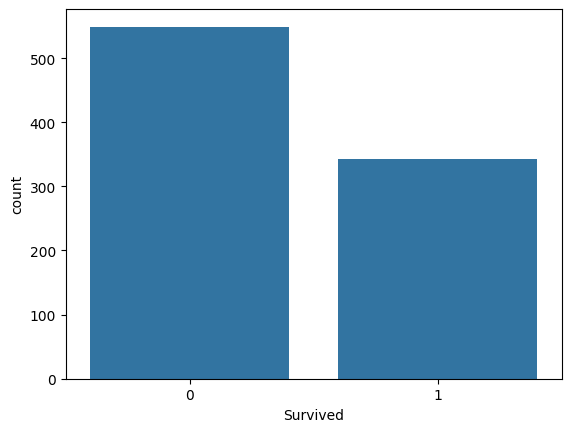

In [40]:
# Check for the target distribution
sns.countplot(x='Survived', data=df_copy)

In [41]:
df_copy['Survived'].value_counts(normalize=True)*100  # Display the distribution of the target variable

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

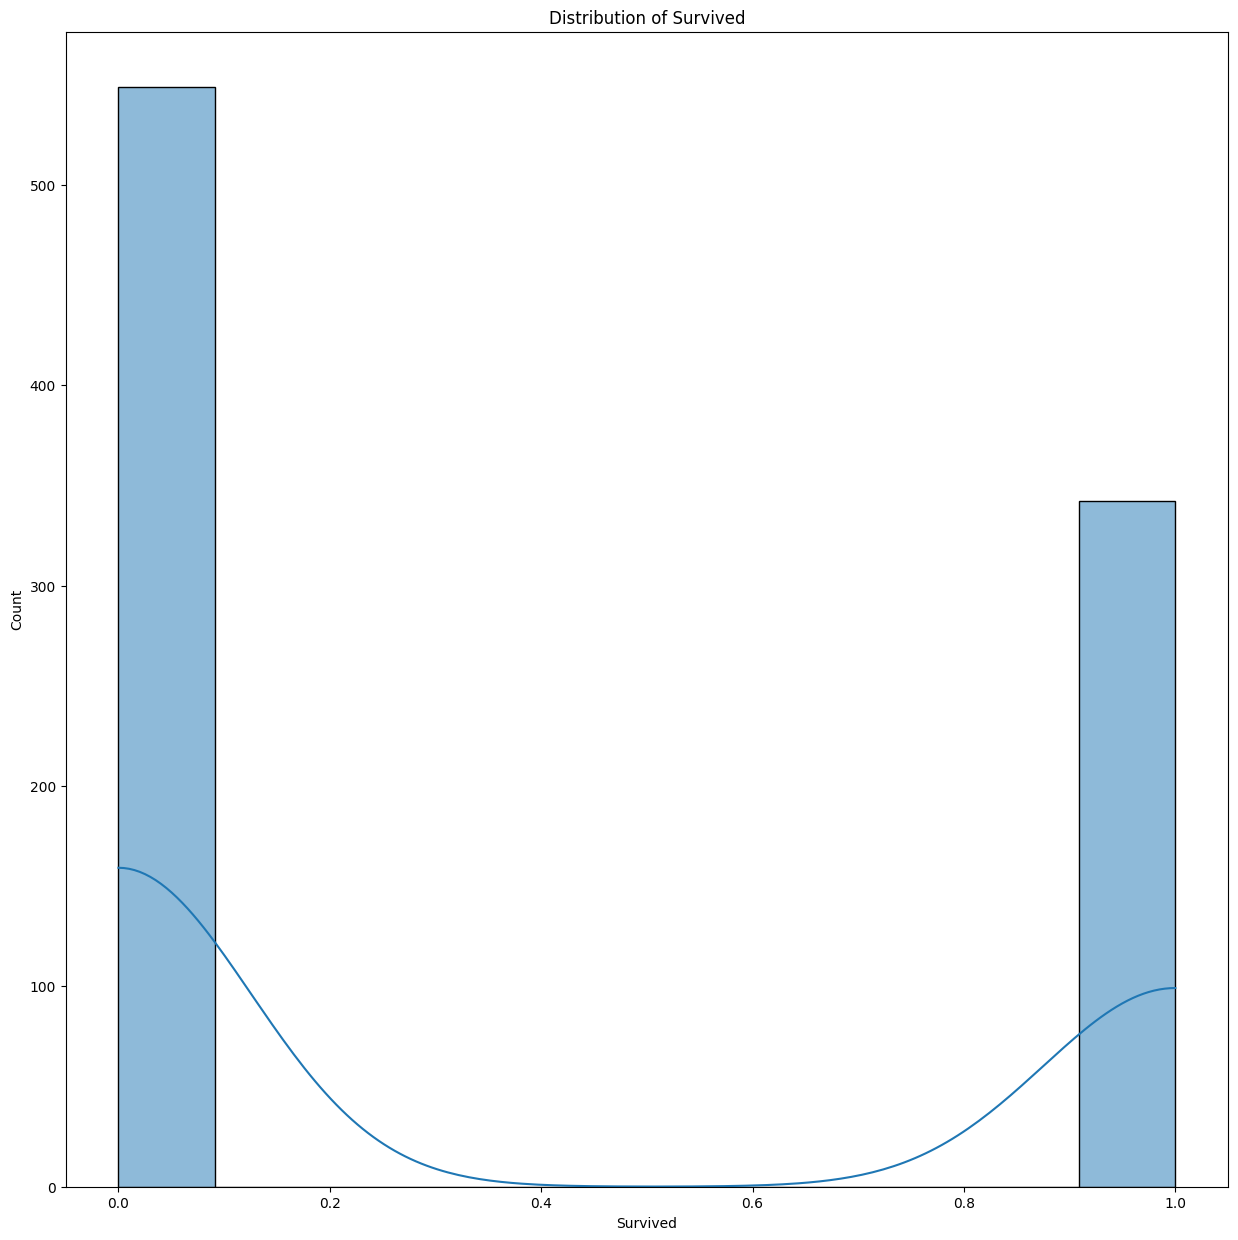

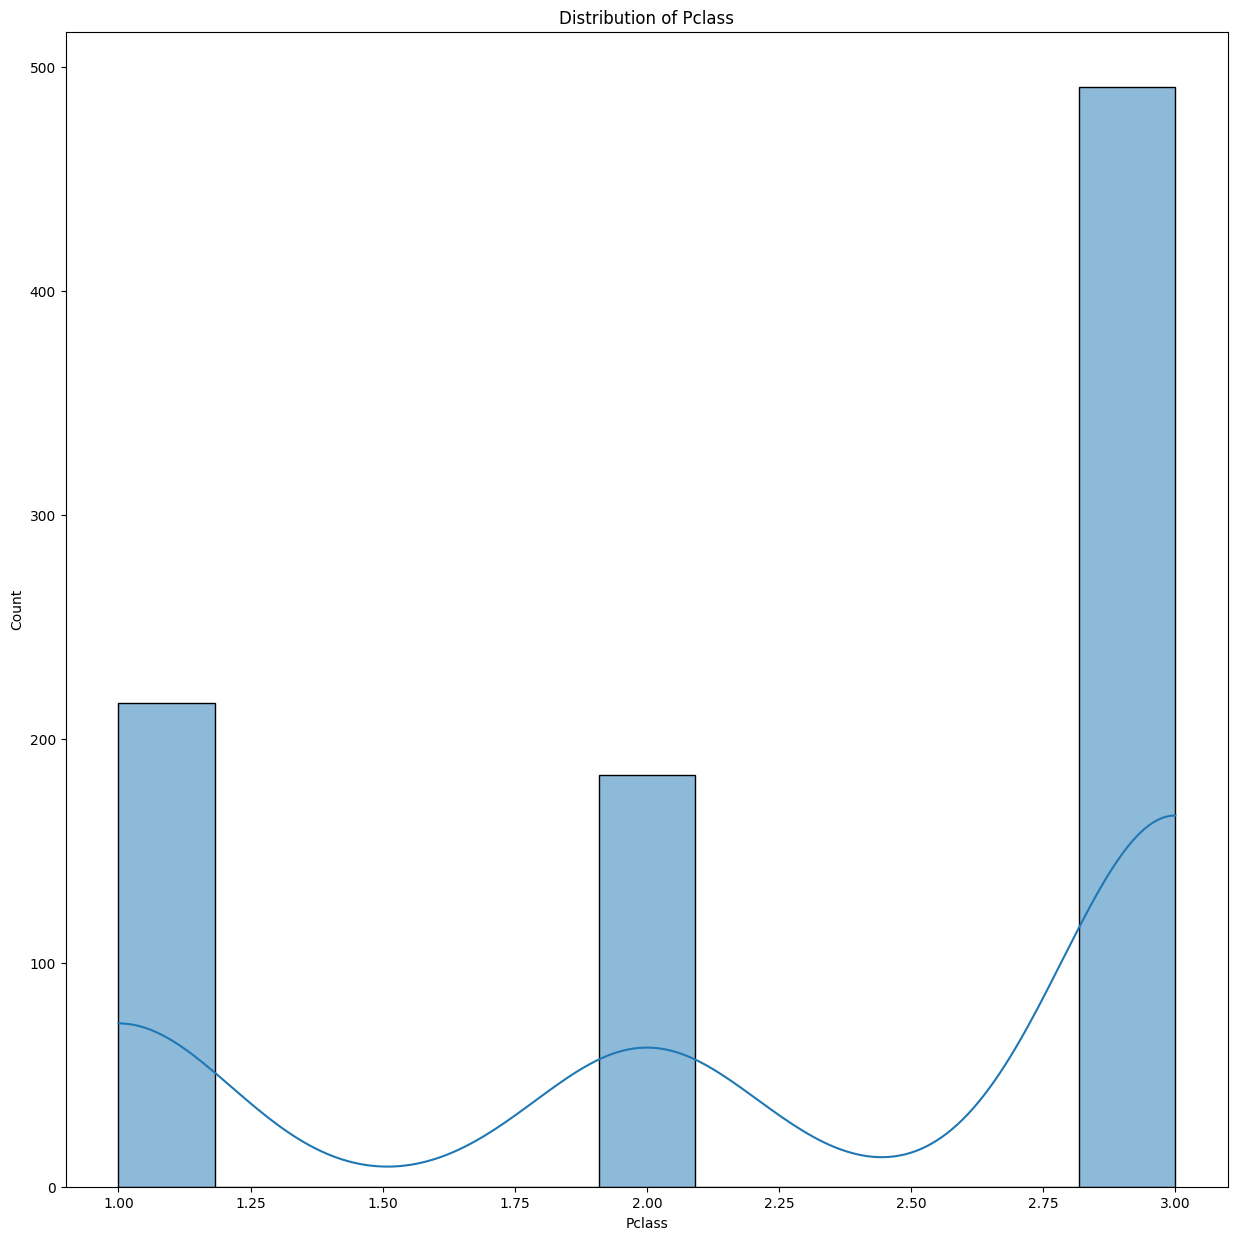

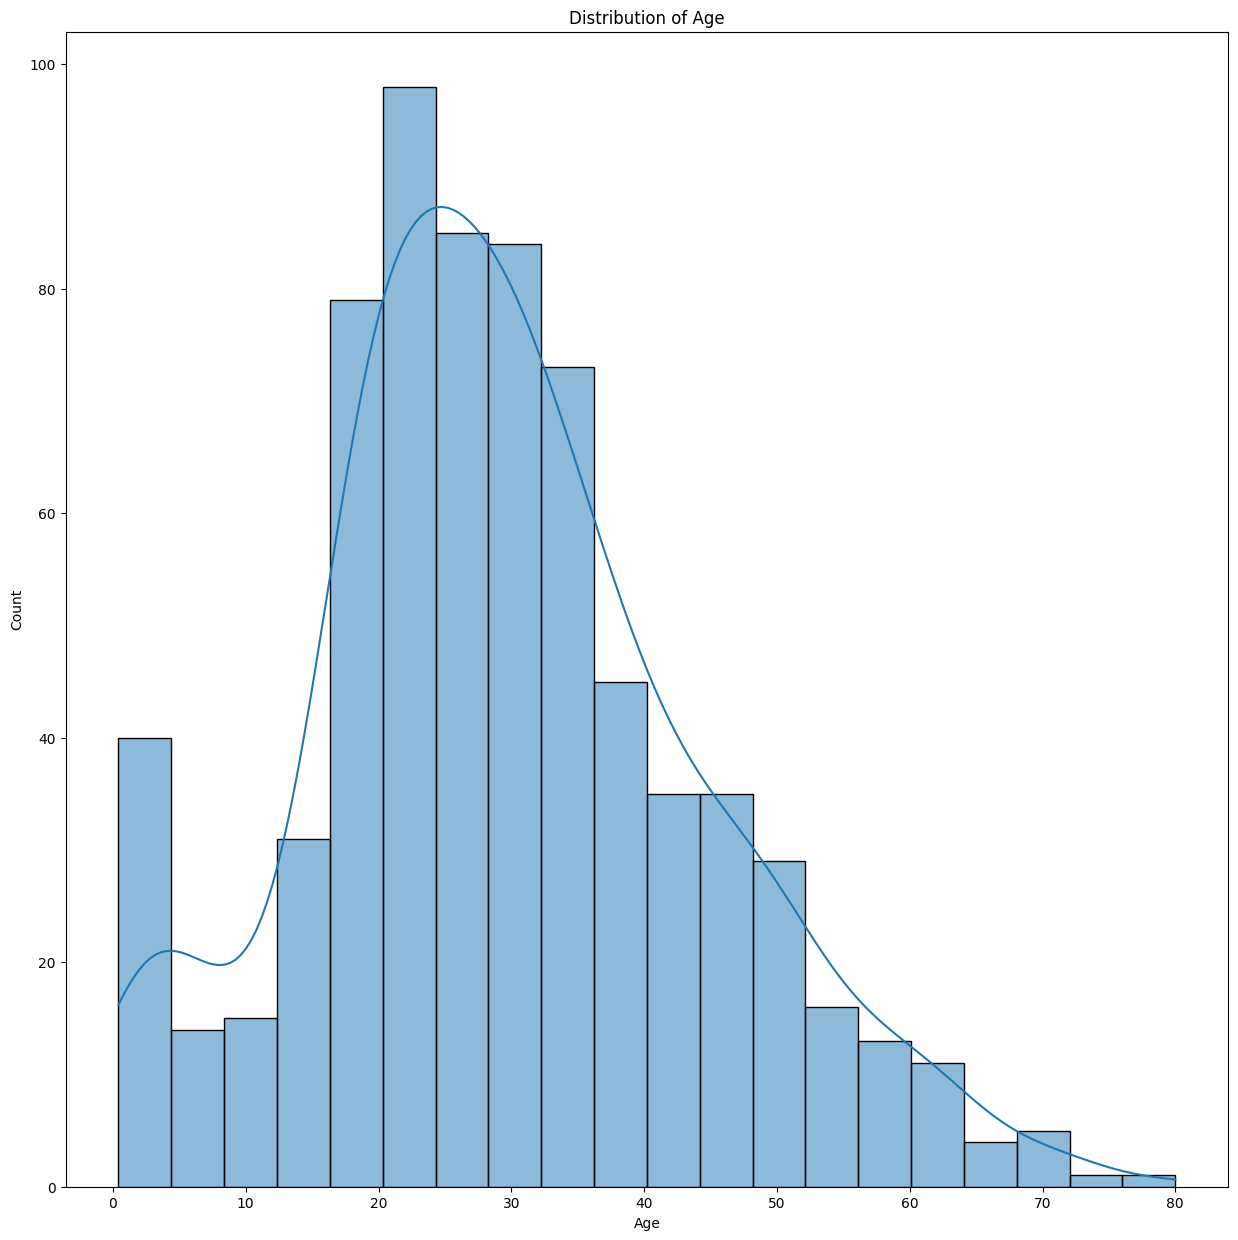

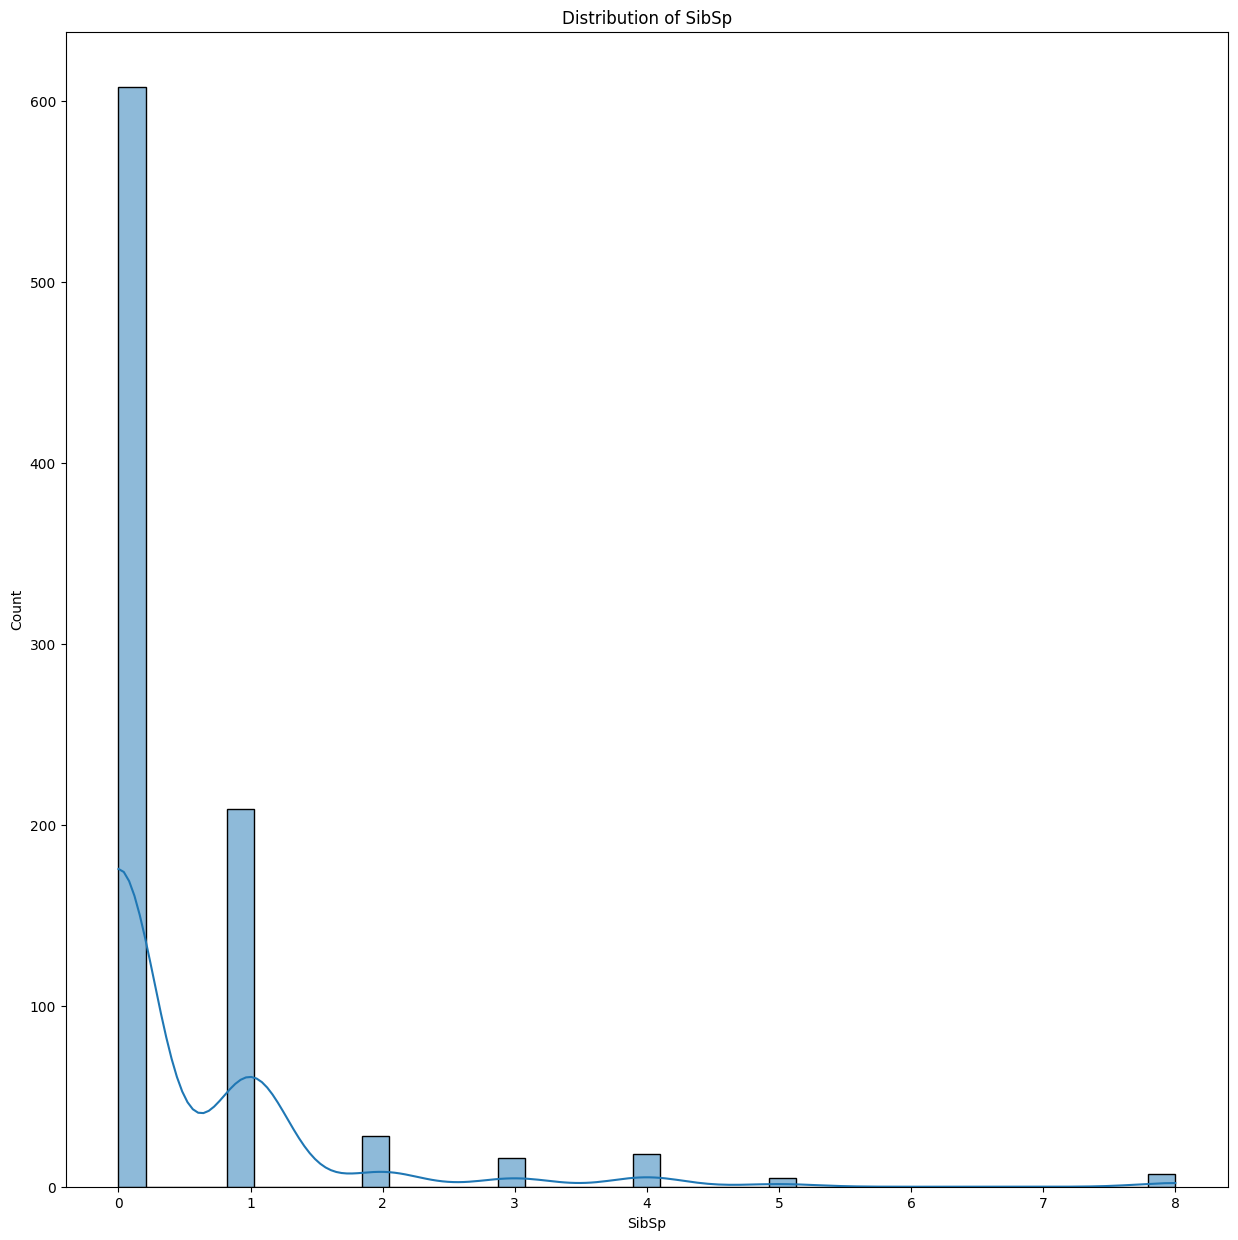

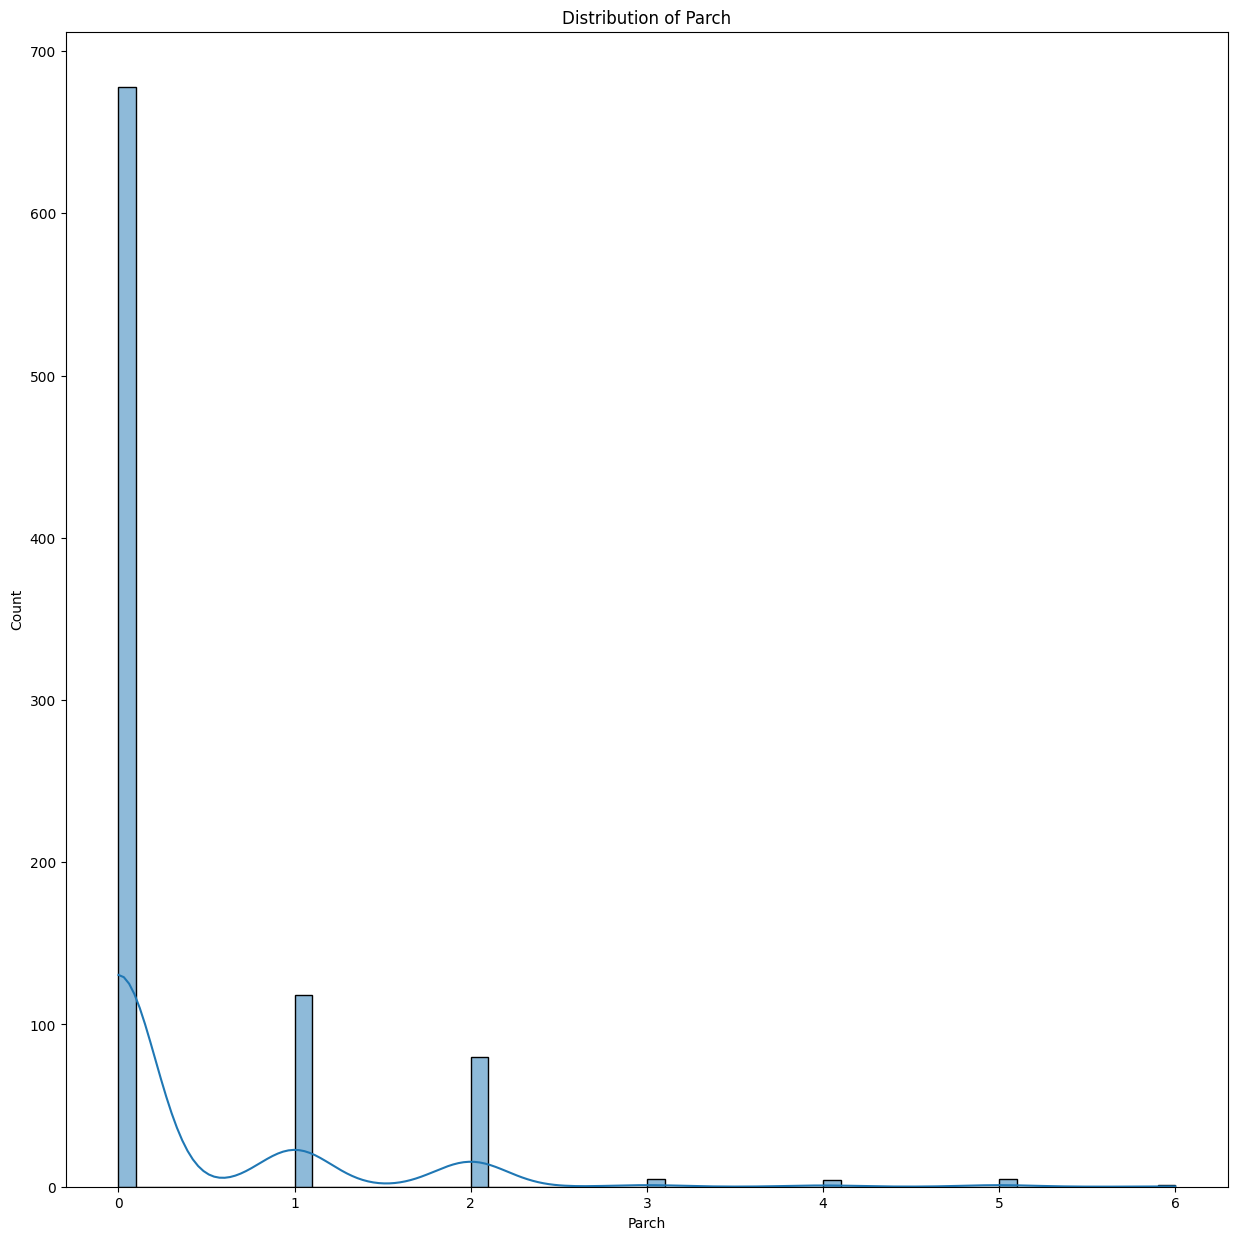

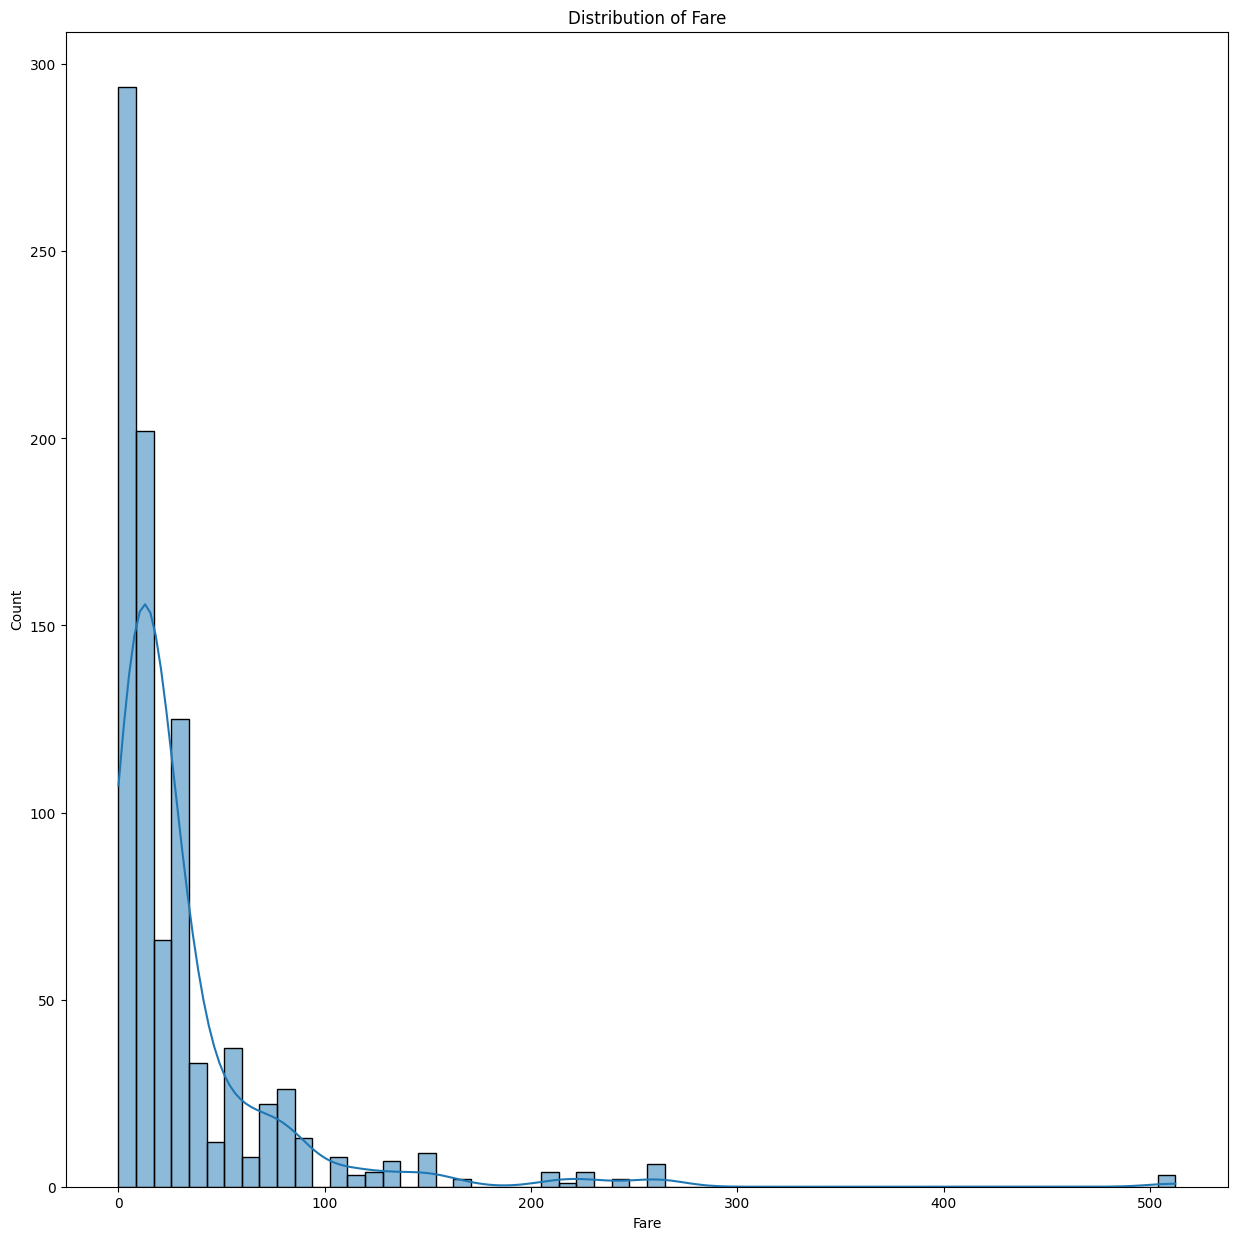

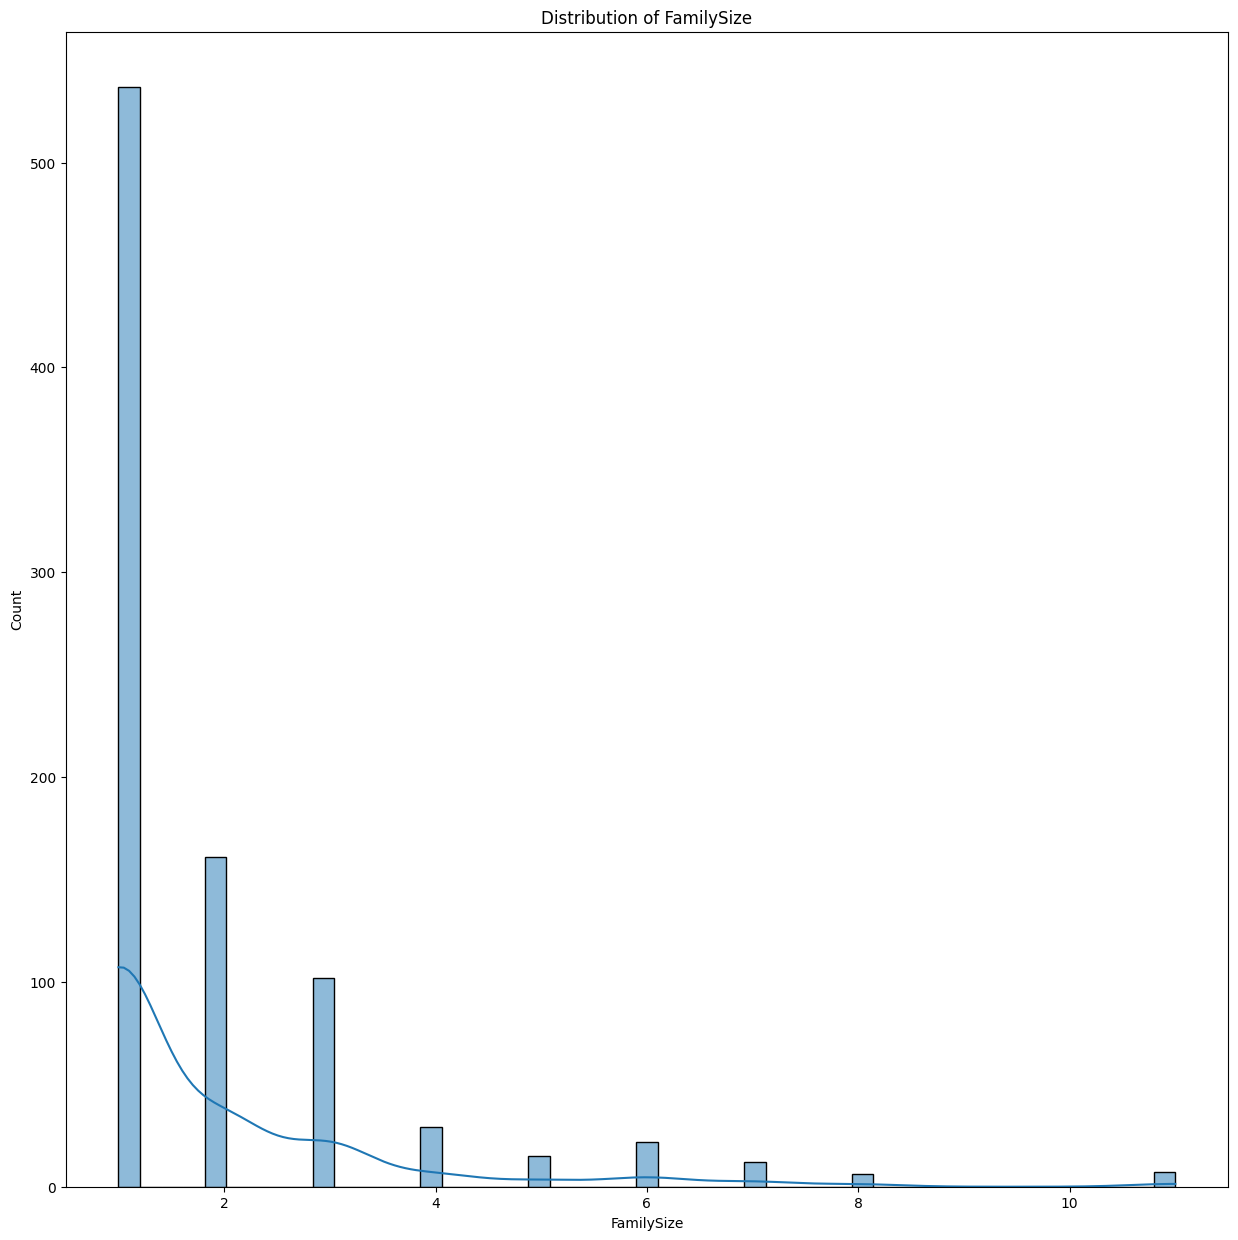

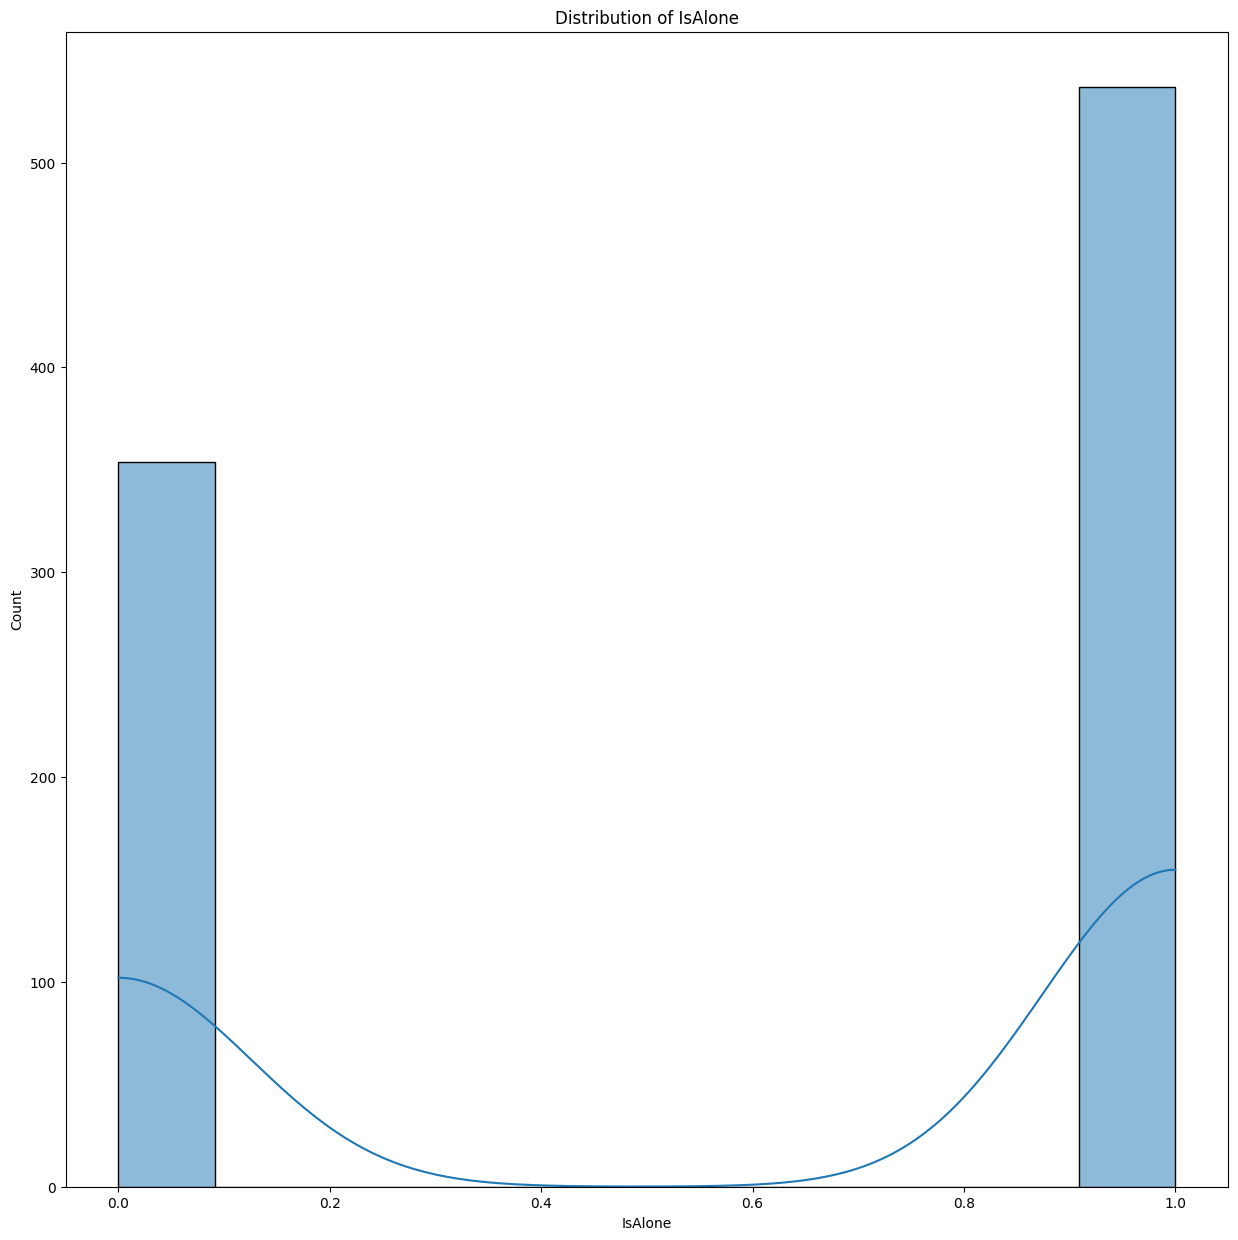

In [42]:
# Univariate analysis for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(15, 15))
    sns.histplot(df_copy[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [43]:
### Observations from the above plots:
# 1. Age: The age distribution is right-skewed, with a peak around 20-30 years. There are some outliers in the older age range.
# 2. Fare: The fare distribution is also right-skewed, with a few high fare values acting as outliers. Most fares are below 100.
# 3. SibSp: The number of siblings/spouses aboard is mostly 0 or 1, with a few passengers having more than 2 siblings/spouses.
# 4. Parch: The number of parents/children aboard is similar to SibSp, with most passengers having 0 or 1 parent/child aboard.
# 5. PassengerId: This is a unique identifier for each passenger, so it doesn't provide useful information for analysis.
# 6. P class: The passenger class is evenly distributed across the three classes, with a slight preference for 3rd class.


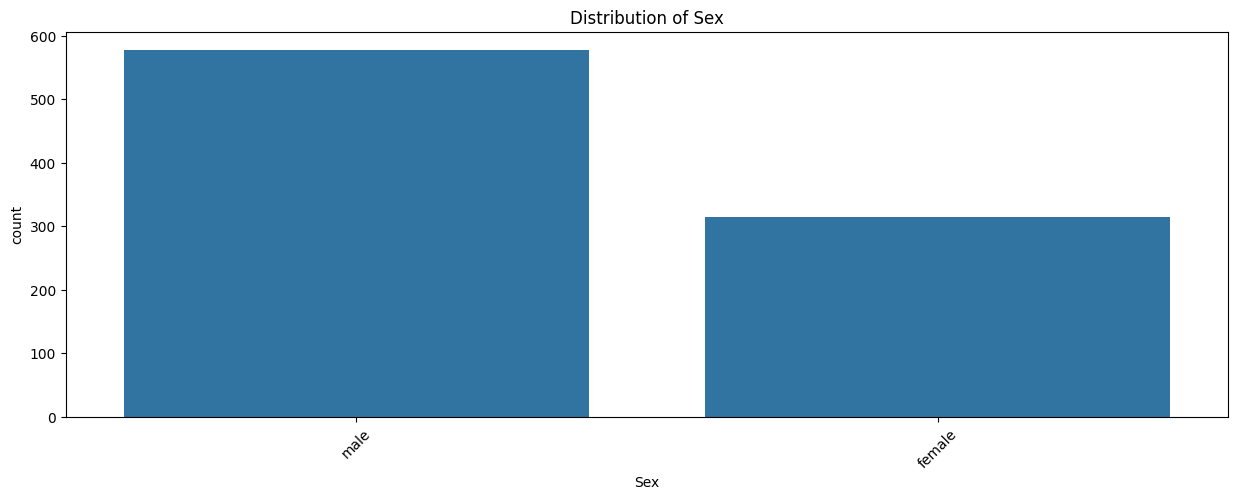

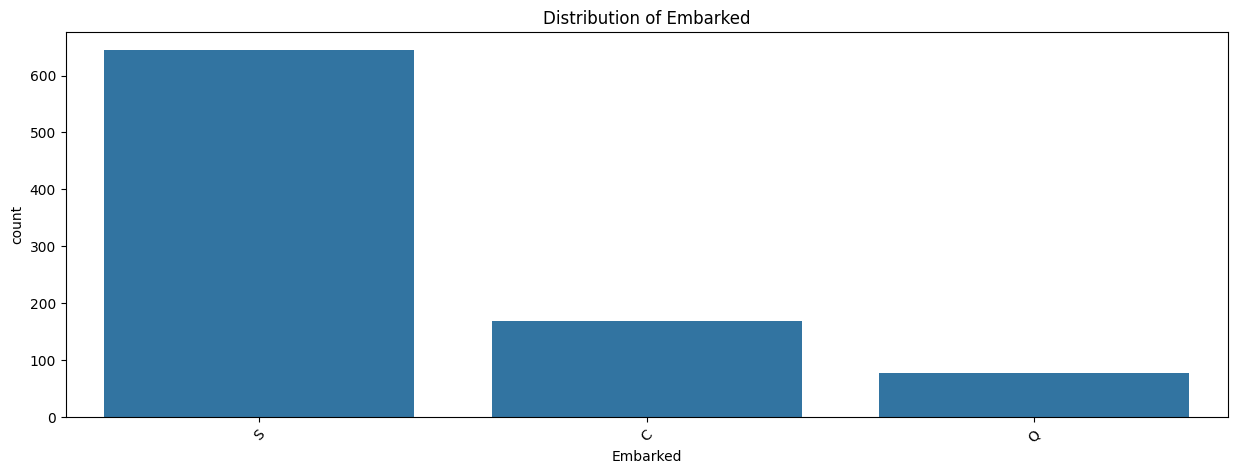

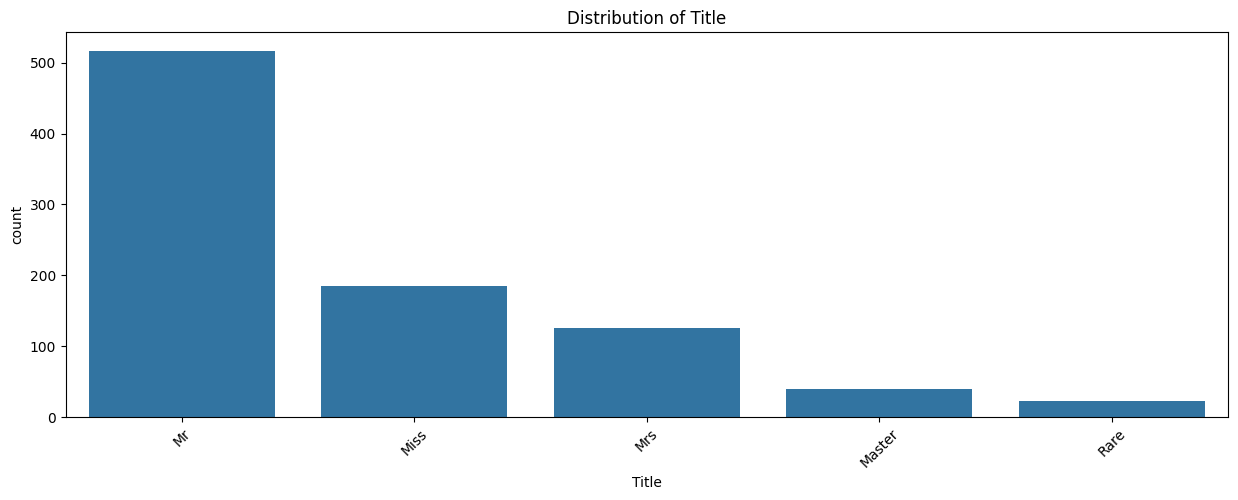

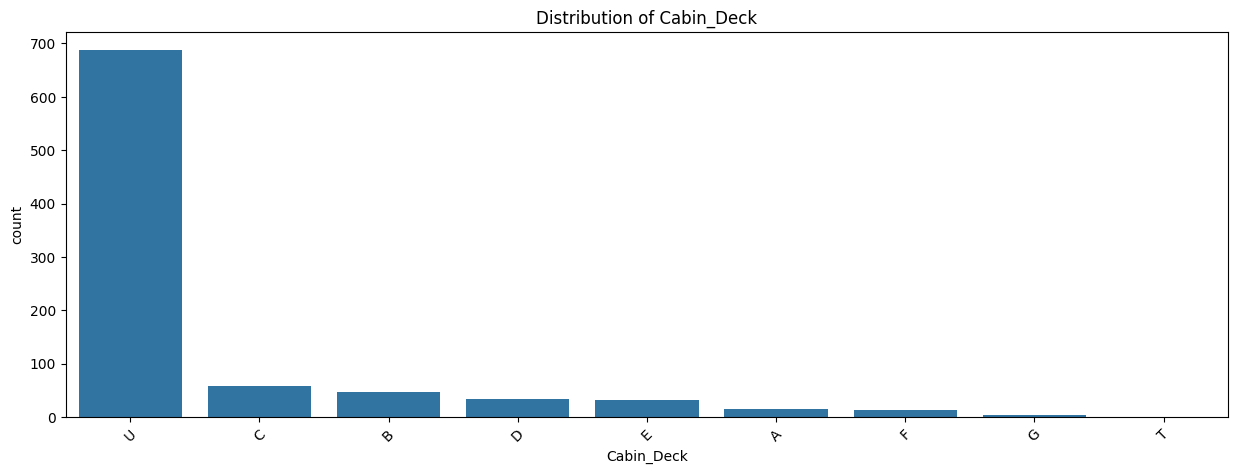

In [44]:
# Univariate analysis for categerical columns
for col in categorical_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=df_copy[col], order=df_copy[col].value_counts().index) # order by frequency(Greater to lower). df_copy[col].value_counts() give the series of counts with category as index and its count as value .index will give the index of the series which is the category
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()



In [45]:
# observations from the above plots:
# Embarked: Most passengers boarded from Southampton (S), followed by Cherbourg (C) and Queenstown (Q).
# Name: This column contains names, which are not useful for analysis. It can be dropped.
# Sex: The dataset has a higher number of male passengers compared to female
# Cabin: Many passengers have missing cabin information, and the distribution of cabin letters is not very informative.
# Ticket: The ticket numbers are not useful for analysis, as they do not provide any meaningful information about the passengers.

In [46]:
# Bivariate analysis can be done to understand the relationship between features and the target variable (Survived).
def bivariate_analysis(df_copy, target):
    # Identify the target type
    if df_copy[target].dtype == 'object' or df_copy[target].nunique() < 10:
        target_type = 'categorical'
    else:
        target_type = 'continuous'
    for feature in df_copy.columns:
        if feature == target:
            continue
        # feature is categorical
        plt.figure(figsize=(10, 5))
        if df_copy[feature].dtype == 'object' or df_copy[feature].nunique() < 10:
            if target_type == 'categorical':
                sns.countplot(x=feature, hue=target, data=df_copy)
                plt.title(f'{feature} vs {target}')
                plt.xticks(rotation=45)
                plt.show()
            else:
                # Check skewness of the target variable
                skewness = df_copy[target].skew()
                if abs(skewness) > 1:
                    agg_func = 'median'
                    temp=df_copy.groupby(feature)[target].median().reset_index()
                else:
                    agg_func = 'mean'
                    temp=df_copy.groupby(feature)[target].mean().reset_index()
                sns.barplot(x=feature, y=target, data=temp)
                plt.title(f'{feature} vs {target} ({agg_func})')
        # feature is continuous
        else:
            if target_type == 'categorical':
                sns.boxplot(x=target, y=feature, data=df_copy)
                plt.title(f'{target} vs {feature}')
            else:
                sns.scatterplot(x=feature, y=target, data=df_copy)
                plt.title(f'{feature} vs {target}')
        plt.tight_layout()
        plt.show()

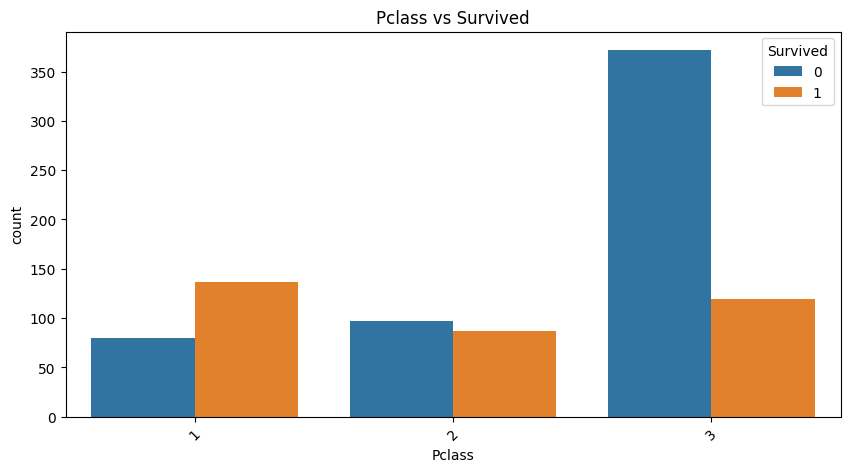

<Figure size 640x480 with 0 Axes>

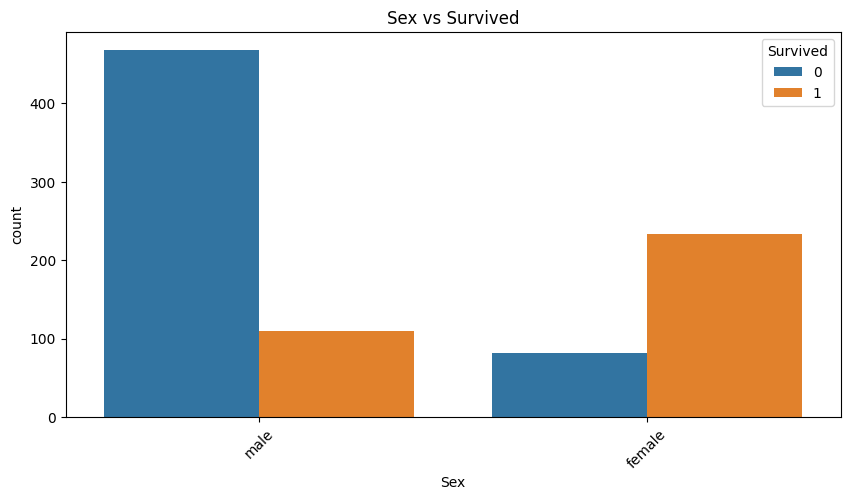

<Figure size 640x480 with 0 Axes>

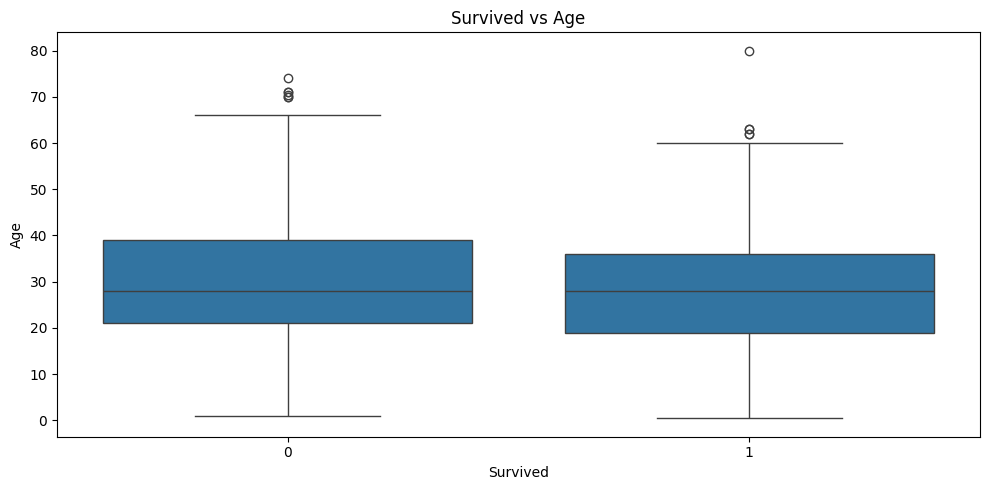

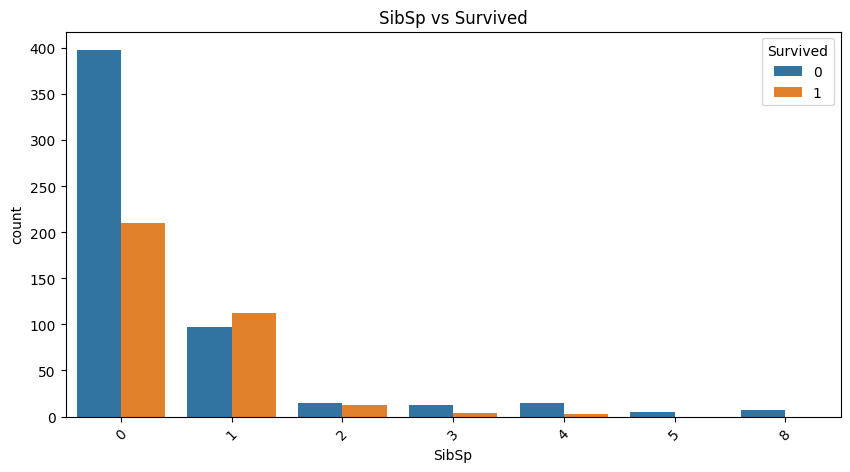

<Figure size 640x480 with 0 Axes>

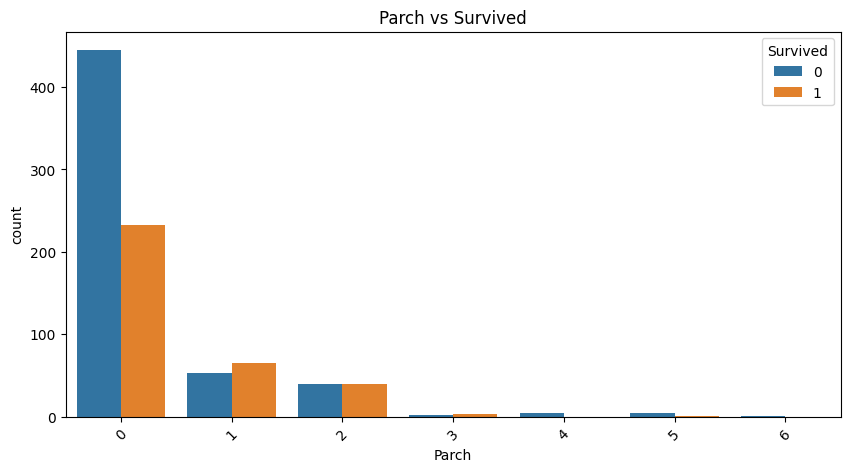

<Figure size 640x480 with 0 Axes>

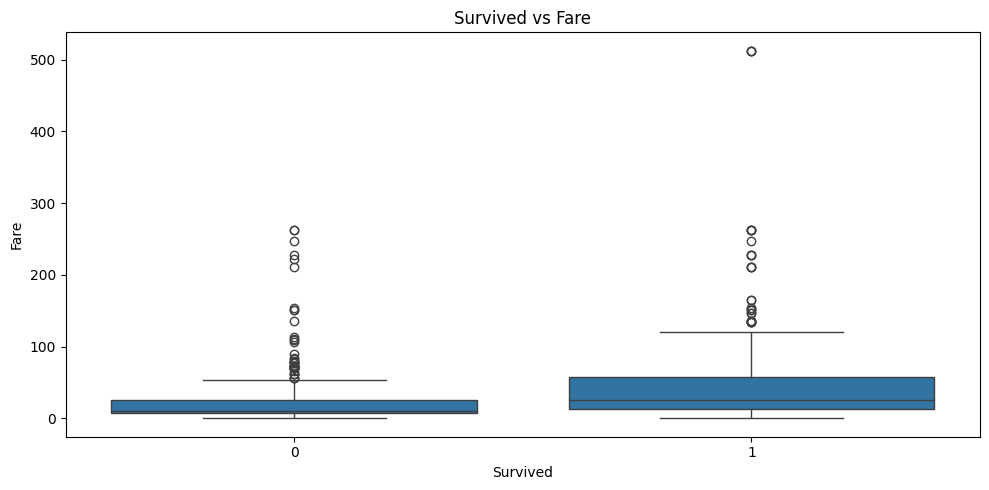

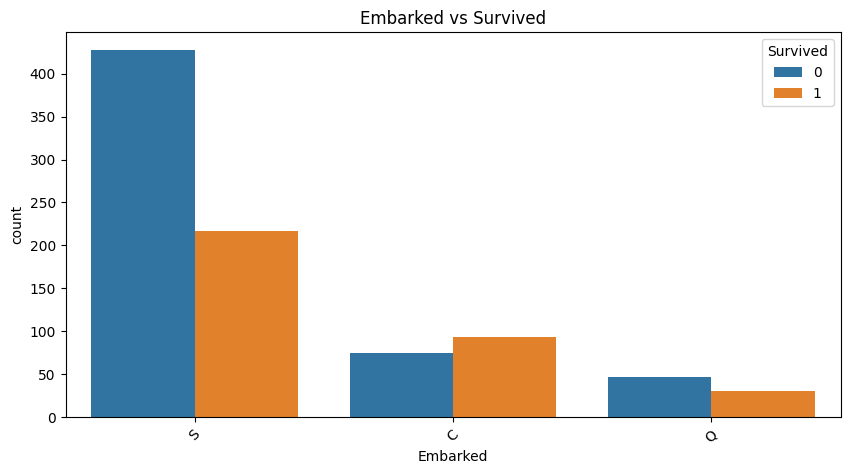

<Figure size 640x480 with 0 Axes>

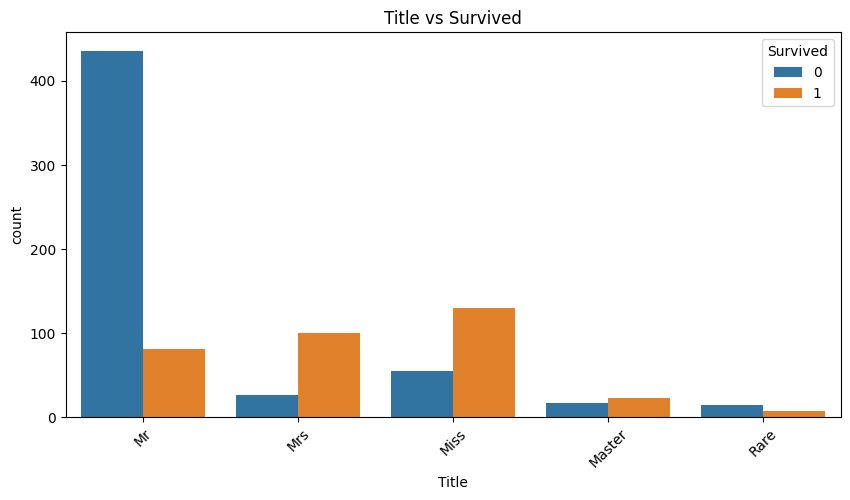

<Figure size 640x480 with 0 Axes>

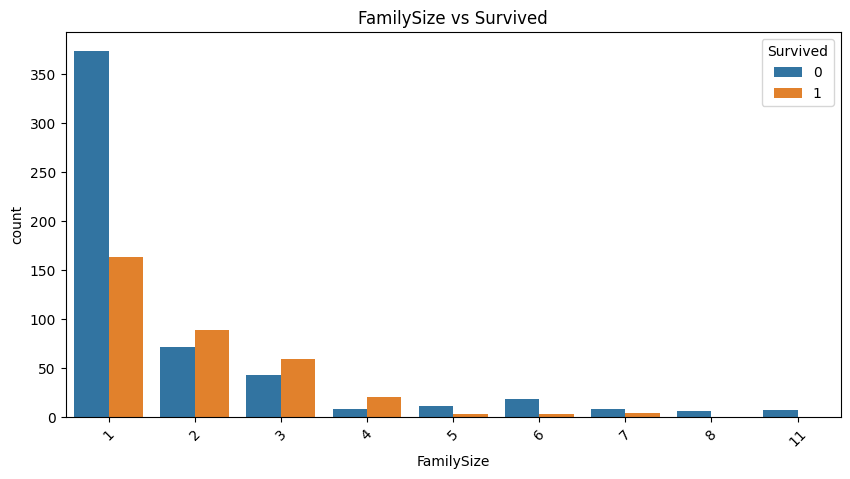

<Figure size 640x480 with 0 Axes>

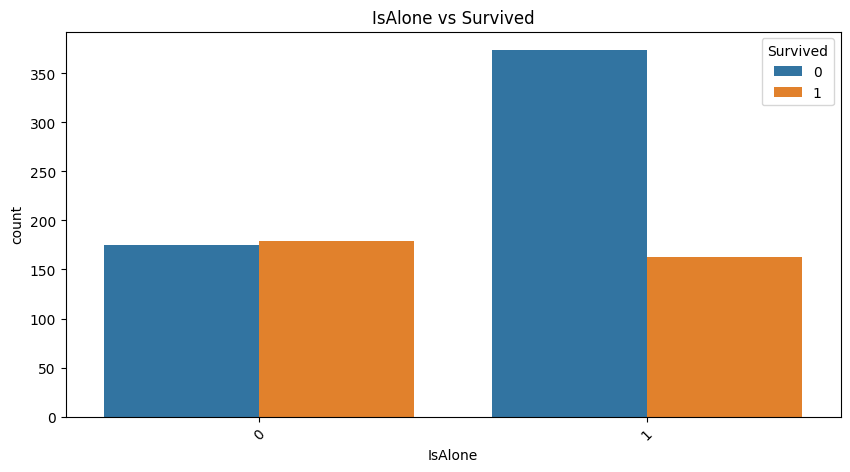

<Figure size 640x480 with 0 Axes>

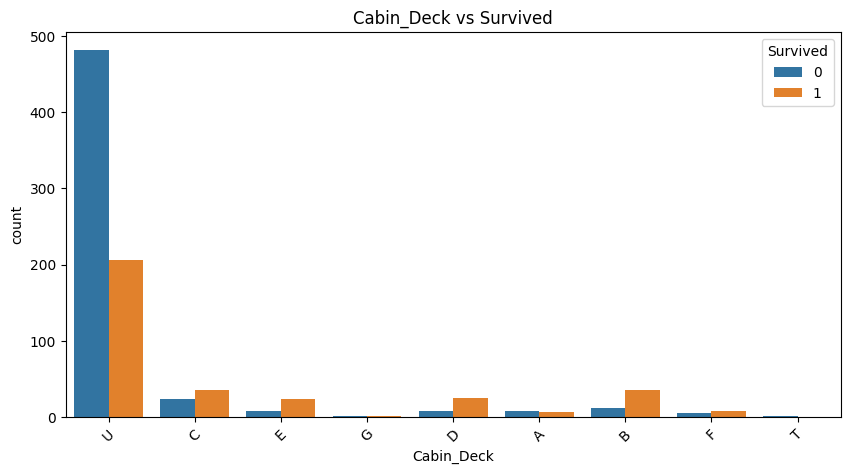

<Figure size 640x480 with 0 Axes>

In [47]:
bivariate_analysis(df_copy, 'Survived')


In [48]:
# observations from the above plots:
# 1. Pclass: Passengers in 1st class had a higher survival rate compared to those in 2nd and 3rd class
# 2. Age: Younger passengers had a higher survival rate, with a noticeable drop in survival for older passengers.
# 3. Fare: Passengers who paid higher fares had a higher survival rate, indicating that wealthier passengers were more likely to survive.
# 4. SibSp: Passengers with fewer siblings/spouses aboard had a higher survival rate, while those with more siblings/spouses had lower survival rates.
# 5. Parch: Similar to SibSp, passengers with fewer parents/children aboard had a higher survival rate
# 6. Embarked: Passengers who boarded from Cherbourg (C) had a higher survival rate compared to those from Southampton (S) and Queenstown (Q).

In [49]:
# Multivariate analysis can be done to understand the relationship between multiple features and the target variable (Survived).
def multivariate_analysis(df_copy, numerical_columns):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df_copy[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()  

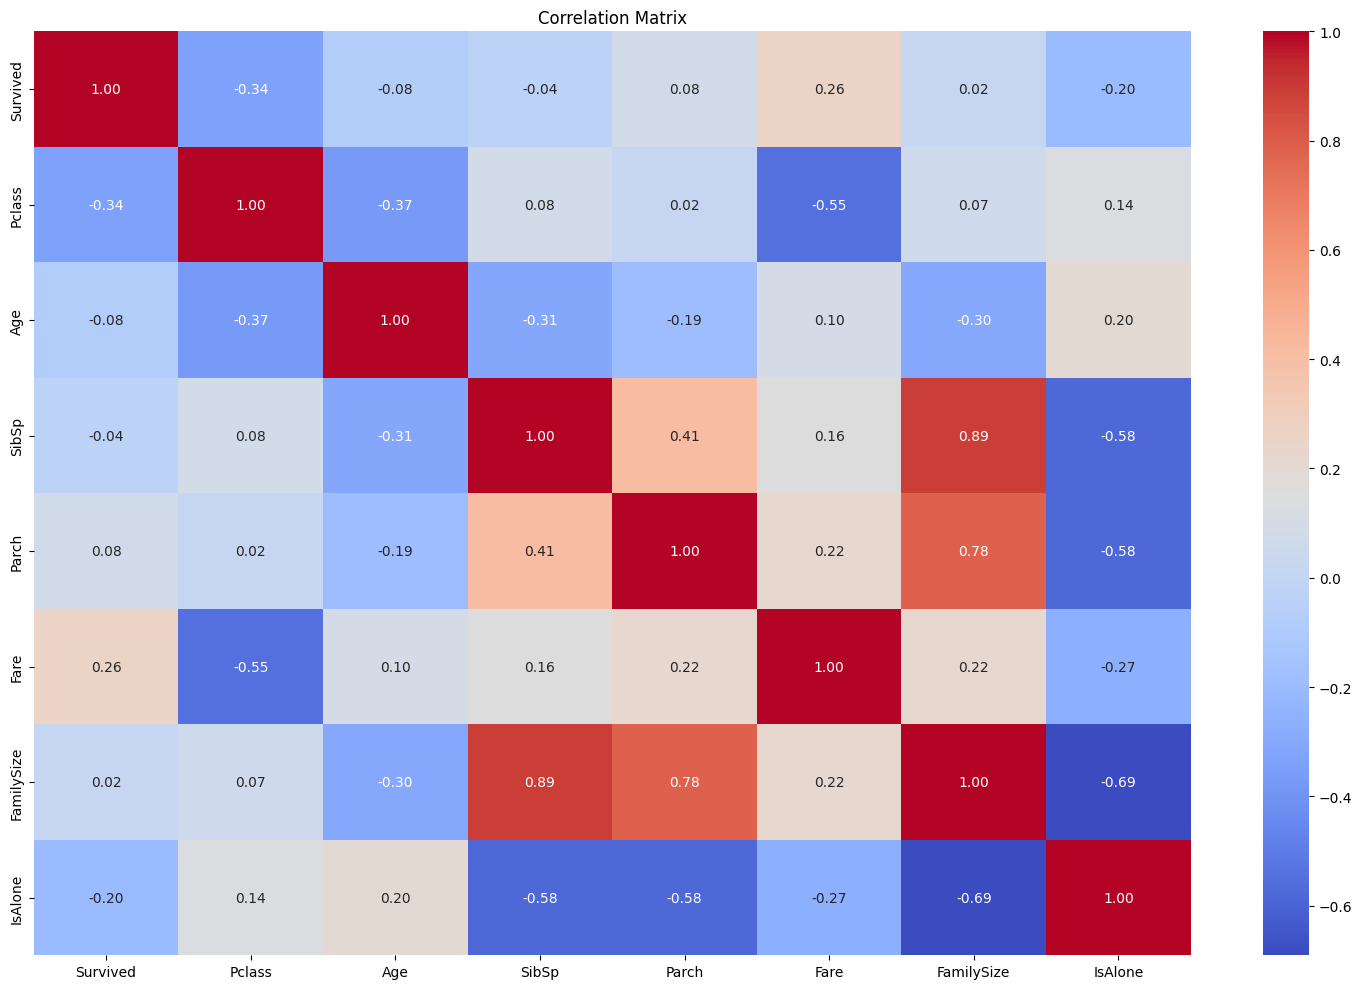

In [50]:
if numerical_columns:
    multivariate_analysis(df_copy, numerical_columns)
else:
    print("No numerical columns available for multivariate analysis.")

In [51]:
import os
# Define the path where you want to save
save_path = os.path.join("data","processed_data", "titanic_cleaned_data.csv")

# Ensure the folder exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the file
df_copy.to_csv(save_path, index=False)

## Feature Engineering

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df_copy.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
FamilySize      0
IsAlone         0
Cabin_Deck      0
dtype: int64

In [54]:
# Create a train test split
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns=['Survived'])
y = df_copy['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 11)
X_test shape: (179, 11)
y_train shape: (712,)
y_test shape: (179,)


### Handling the missing values

In [55]:
df_copy.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Title          object
FamilySize      int64
IsAlone         int64
Cabin_Deck     object
dtype: object

In [56]:
# Give me the columns that has negative values 
negative_columns = [
    col for col in df_copy.columns 
    if pd.api.types.is_numeric_dtype(df_copy[col]) and (df_copy[col] < 0).any()
]
print("Columns with negative values:", negative_columns)

Columns with negative values: []


In [57]:
# Give me the columns that has zero values
zero_columns = [
    col for col in df_copy.columns 
    if pd.api.types.is_numeric_dtype(df_copy[col]) and (df_copy[col] == 0).any()
]
print("Columns with zero values:", zero_columns)

Columns with zero values: ['Survived', 'SibSp', 'Parch', 'Fare', 'IsAlone']


#### Fill the missing values

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.fill_values_ = {}   # stores learned values

    def fit(self, X, y=None):
        X_ = X.copy()

        # Learn rules for all other columns
        for col in X_.columns: 
            if X_[col].dtype == "object" or X_[col].dtype.name == 'category':
                if X_[col].isnull().sum() > 0:
                    self.fill_values_[col] = X_[col].mode()[0]
            else:
                if X_[col].isnull().sum() > 0:
                    skewness = X_[col].skew()
                    if skewness > 1 or skewness < -1:
                        self.fill_values_[col] = X_[col].median()
                    else:
                        self.fill_values_[col] = X_[col].mean()
        return self

    def transform(self, X):
        X_ = X.copy()

        # Apply learned rules
        for col, fill_value in self.fill_values_.items():
            if col in X_.columns:
                X_[col] = X_[col].fillna(fill_value)

        # Handle unseen missing columns (only in test)
        for col in X_.columns:
            if X_[col].isnull().sum() > 0 and col not in self.fill_values_:
                if X_[col].dtype == "object":
                    fill_value = X_[col].mode()[0]
                else:
                    skewness = X_[col].skew()
                    if skewness > 1 or skewness < -1:
                        fill_value = X_[col].median()
                    else:
                        fill_value = X_[col].mean()
                X_[col] = X_[col].fillna(fill_value)

        return X_

#### Outlier Handling

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, discrete_threshold=10, skew_threshold=0.75):
       # self.outlier_columns = outlier_columns
        self.discrete_threshold = discrete_threshold
        self.skew_threshold = skew_threshold
        self.params_ = {}
        self.outlier_columns = []
    # we need to give y=None as the scikit-learn’s Pipeline, GridSearchCV, cross_val_score, and other utilities always pass both X and y to .fit(), even for unsupervised transformers (like imputers, scalers, outlier handlers, etc.) even if they are not used.
    # This is to ensure compatibility with scikit-learn's API.
    def fit(self, X, y=None):
        X_ = X.copy()
        numeric_columns= X_.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            if X_[col].dropna().empty:
                continue
            unique_values = X_[col].nunique()
            col_type = 'discrete' if unique_values <= self.discrete_threshold else 'continuous' 
            Q1 = X_[col].quantile(0.25)
            Q3 = X_[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            extreme_outliers = ((X_[col] < lower_bound) | (X_[col] > upper_bound)).sum()
            if extreme_outliers > 0:
                self.outlier_columns.append(col)
                if col_type == 'discrete':
                    self.params_[col] = ('cap', lower_bound, upper_bound)
                else:
                    skewness = X_[col].skew()
                    if abs(skewness) > self.skew_threshold:
                        if (X_[col] >= 0).all():
                            self.params_[col] = ('log',)
                        else:
                            self.params_[col] = ('yeojohnson',)
                    else:
                        self.params_[col] = ('cap', lower_bound, upper_bound)
        return self  # fit method returns the self which is a common practice in scikit-learn to allow for method chaining
    
    def transform(self, X):
        X_ = X.copy()
        for col, params in self.params_.items():
            if params[0] == 'cap':
                _, lower, upper = params
                X_[col] = np.where(X_[col] < lower, lower,
                                   np.where(X_[col] > upper, upper, X_[col]))
            elif params[0] == 'log':
                X_[col] = np.log1p(X_[col])
            elif params[0] == 'yeojohnson':
                X_[col], _ = yeojohnson(X_[col])
        return X_ # transform method returns the transformed DataFrame, allowing for further processing or model fitting

#### Column Transformer for Encoding and Scaling

In [60]:
df_copy.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Title          object
FamilySize      int64
IsAlone         int64
Cabin_Deck     object
dtype: object

In [61]:
categorical_columns

['Sex', 'Embarked', 'Title', 'Cabin_Deck']

In [62]:
numerical_columns

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'FamilySize',
 'IsAlone']

In [63]:
# find the unique values in categorical columns
for col in categorical_columns:
    unique_values = df_copy[col].unique()
    print(f"{col} unique values count: {len(unique_values)}")
    print(f"Column: {col}, Unique Values: {unique_values}")
    print("-" * 40)

Sex unique values count: 2
Column: Sex, Unique Values: ['male' 'female']
----------------------------------------
Embarked unique values count: 4
Column: Embarked, Unique Values: ['S' 'C' 'Q' nan]
----------------------------------------
Title unique values count: 5
Column: Title, Unique Values: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
----------------------------------------
Cabin_Deck unique values count: 9
Column: Cabin_Deck, Unique Values: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
----------------------------------------


In [64]:
continuous_numeric_features = [
    col for col in numerical_columns
    if col in X_train.columns and X_train[col].nunique() > 10
]

In [65]:
ordinal_columns = ["AgeBin", "FareBin"]

In [66]:
# Include all other categorical columns as nominal which are not ordinal
nominal_categorical_columns = [
    col for col in categorical_columns
    if col not in ordinal_columns
]

In [67]:
nominal_categorical_columns

['Sex', 'Embarked', 'Title', 'Cabin_Deck']

In [68]:
continuous_numeric_features

['Age', 'Fare']

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from category_encoders import TargetEncoder

def build_preprocessor(ordinal_columns, nominal_categorical_columns, continuous_numeric_features):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_columns),
            ('nom', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
             nominal_categorical_columns),
            ('num', StandardScaler(), continuous_numeric_features)
        ],
        remainder='drop'
    )
    return preprocessor

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin
class Binner(BaseEstimator, TransformerMixin):
    def __init__(self, column, bins, labels):
        self.column = column
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_[self.column + "Bin"] = pd.cut(
            X_[self.column], bins=self.bins, labels=self.labels, include_lowest=True
        )
        return X_

In [71]:
from sklearn.pipeline import Pipeline
def build_pipeline(ordinal_columns,nominal_categorical_columns, numeric_features, model):
    preprocessor = build_preprocessor(ordinal_columns, nominal_categorical_columns, numeric_features)
    custmomimputer= CustomImputer()
    pipe = Pipeline([
        ('custom_imputer', custmomimputer),
        ('outliers', OutlierHandler()),
         # 3. Create bins (AgeBin, FareBin)
        ('age_binner', Binner("Age", 
                              bins=[0, 12, 18, 35, 50, 80], 
                              labels=["Child", "Teen", "Adult", "MiddleAge", "Senior"])),
        ('fare_binner', Binner("Fare", 
                               bins=[-0.1, 7.91, 14.45, 31, 600], 
                               labels=["Low", "Mid", "High", "VeryHigh"])),
        ('encode_scale', preprocessor),
        ('model', model)
    ])
    return pipe

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. Define Model
# --------------------------
log_reg = GridSearchCV(
    estimator=Pipeline([
           # scale numeric features
        ("model", LogisticRegression(max_iter=5000))
    ]),
    param_grid={
        'model__C': [0.01, 0.1, 1, 10, 100],        # regularization strength
        'model__penalty': ['l2'],                   # l1 can be added if solver='liblinear'
        'model__fit_intercept': [True, False],
    },
    cv=5,
    scoring='accuracy'  # optimize for accuracy
)

# --------------------------
# 2. Outer CV Loop
# --------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = build_pipeline(
    ordinal_columns=ordinal_columns,
    nominal_categorical_columns=nominal_categorical_columns,
    numeric_features=continuous_numeric_features,
    model=log_reg
)

# cross-validated predictions for classification metrics
y_pred_cv = cross_val_predict(pipe, X_train, y_train, cv=cv)

# --------------------------
# 3. Metrics
# --------------------------
print("\nClassification Report (CV):")
print(classification_report(y_train, y_pred_cv))

print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_cv))
print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print("Precision:", precision_score(y_train, y_pred_cv))
print("Recall:", recall_score(y_train, y_pred_cv))
print("F1 Score:", f1_score(y_train, y_pred_cv))

# ROC-AUC (need predicted probabilities)
pipe.fit(X_train, y_train)
y_proba_cv = pipe.predict_proba(X_train)[:, 1]
print("ROC-AUC:", roc_auc_score(y_train, y_proba_cv))

# --------------------------
# 4. Retrain on Full Training Data
# --------------------------
final_pipe = build_pipeline(
    ordinal_columns=ordinal_columns,
    nominal_categorical_columns=nominal_categorical_columns,
    numeric_features=continuous_numeric_features,
    model=log_reg
)

final_pipe.fit(X_train, y_train)
cv_scores = cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))

c:\Mounika\All Projects\titanic-survival-prediction-v2\titanicv2_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Classification Report (CV):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       444
           1       0.72      0.70      0.71       268

    accuracy                           0.79       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712

Confusion Matrix:
 [[373  71]
 [ 81 187]]
Accuracy: 0.7865168539325843
Precision: 0.7248062015503876
Recall: 0.6977611940298507
F1 Score: 0.7110266159695817
ROC-AUC: 0.8515320357671105
CV Accuracy: 0.7823 ± 0.0226


c:\Mounika\All Projects\titanic-survival-prediction-v2\titanicv2_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [73]:
'''df_test= pd.read_csv('test.csv')
df_test.head()'''

"df_test= pd.read_csv('test.csv')\ndf_test.head()"